### Add fine-grained labels to main immune UMAP 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import warnings
import anndata
warnings.filterwarnings('ignore')


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './final-figures/merged/labels_apr2021/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
backcall            0.2.0
cairo               1.20.0
cffi                1.14.5
constants           NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
highs_wrapper       NA
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
joblib              1.0.1
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.35.0
matplotlib          3.3.4
mpl_toolkits        NA
natsort             7.1.1
numba               0.52.0
numexpr             2.7.2
numpy               1.19.5
packaging           20.9
pandas              1.2.2
parso               0.8.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.16
psutil      

'/home/jovyan/my-conda-envs/scanpy_env/bin/python'

In [2]:
import rpy2.rinterface_lib.callbacks
import logging

In [3]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [4]:
import anndata2ri
anndata2ri.activate()

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R

library(Matrix)
library(Seurat)
library(dplyr)
library(data.table)
library(GenomicRanges)

#### Load data

In [7]:
path_to_gonads = '/nfs/team292/vl6/immune_fetal_gonads/'

In [3]:
adata = sc.read(path_to_gonads + 'immune_merged_lineages.h5ad')
adata.shape

(19538, 20675)

running Leiden clustering
    finished: found 32 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


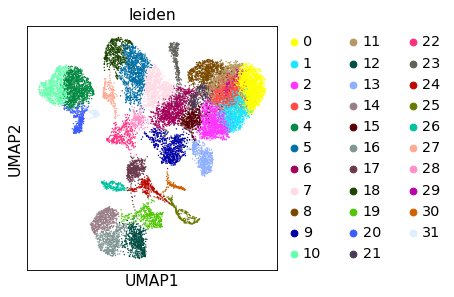

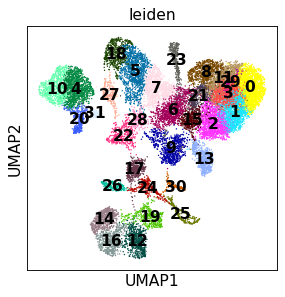

In [9]:
sc.tl.leiden(adata, resolution= 1.5) # high resolution 

sc.pl.umap(adata, color='leiden')
sc.pl.umap(adata, color='leiden',legend_loc='on data',save='_clustering_clusnumbers.pdf')


#### Visualize 

In [11]:
gonads_colors = ['#c466b0', '#779eed', '#aad3f2', '#71a2c7', '#60bddb',   '#70ccbe', 
               '#7b9e99', '#91bd80', '#bdb380',  '#d4db81', '#ebd3c3',  '#dba781', 
               '#e08b8b', '#edb7b7', '#d9abb7', '#d96884', '#e64e74', '#d9a5c3', '#cc8fdb']

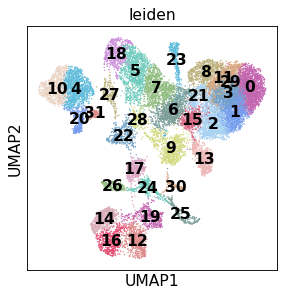

In [11]:
sc.pl.umap(adata, color = 'leiden', palette = gonads_colors, legend_loc = 'on data',
          save = '_clustering_clusnumbers.pdf')

In [9]:
# Assign cell type to leiden cluster based on gene expression and label transfer
# from human fetal liver hematopoiesis 
clusters = {'0' : 'tissue-repair mac', '1' : 'tissue-repair mac', 
           '2' : 'tissue-repair mac', '15' : 'tissue-repair mac', 
           '3' : 'tissue-repair mac', '11' : 'tissue-repair mac', 
           '8' : 'tissue-repair mac', '29' : 'tissue-repair mac',
            '6' : 'cDC2', '13' : 'microglia-like mac',
           '23' : 'SIGLEC15+ mac', '21' : 'ifn-induced mac', 
           '9' : 'tissue-repair mac cycling', '7' : 'mono', '5' : 'mono', 
           '18' : 'mono', '27' : 'neutro', '22' : 'NMP', '28' : 'mono', 
           '20' : 'early T', '31' : 'early T', '4' : 'early T', '10' : 'NK', 
           '17' : 'HSC/MPP', '24' : 'MEMP', '30' : 'pDC prec', '25' : 'mega', '26' : 'mast',
           '19' : 'pro-B', '12' : 'pro-B', '16' : 'pre-B', '14' : 'B cell'}
adata.obs['clusters'] = adata.obs['leiden'].map(clusters)
adata.obs['clusters'].value_counts(dropna = False)                  

tissue-repair mac            7620
mono                         2668
early T                      1528
pro-B                        1015
cDC2                         1003
NK                            743
tissue-repair mac cycling     743
microglia-like mac            571
B cell                        547
pre-B                         519
HSC/MPP                       489
ifn-induced mac               355
NMP                           343
SIGLEC15+ mac                 329
MEMP                          274
mega                          226
mast                          211
neutro                        210
pDC prec                      144
Name: clusters, dtype: int64

... storing 'clusters' as categorical


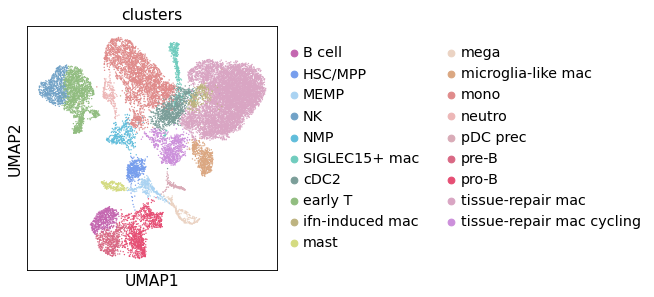

In [12]:
sc.pl.umap(adata, color = 'clusters', palette = gonads_colors)

In [14]:
# Order categories 
adata.obs['clusters'] = adata.obs['clusters'].cat.reorder_categories(['HSC/MPP', 
      'pro-B', 'pre-B', 'B cell', 'pDC prec', 'MEMP', 'mega', 'mast',
       'early T', 'NK', 'NMP', 'neutro',
       'mono', 'cDC2', 
       'tissue-repair mac', 'tissue-repair mac cycling', 'ifn-induced mac', 'microglia-like mac', 
        'SIGLEC15+ mac'])

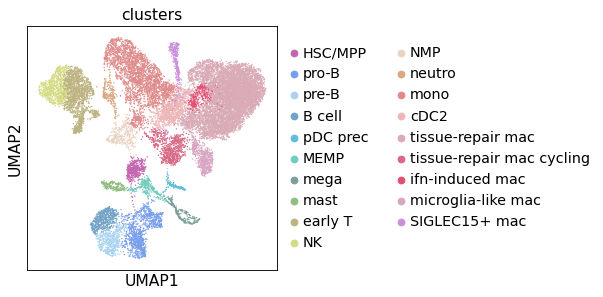

In [15]:
sc.pl.umap(adata, color = 'clusters', palette = gonads_colors, save = '_clean_clusters.pdf')

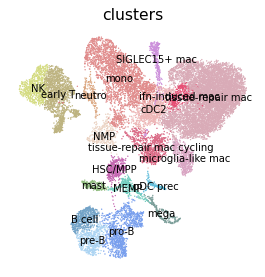

In [16]:
sc.pl.umap(adata, color = 'clusters', palette = gonads_colors, 
          legend_loc = 'on data', legend_fontweight = 'medium', 
           legend_fontsize = 9, save = '_clusters_ondata.pdf',
          frameon = False)

#### Immune dotplot

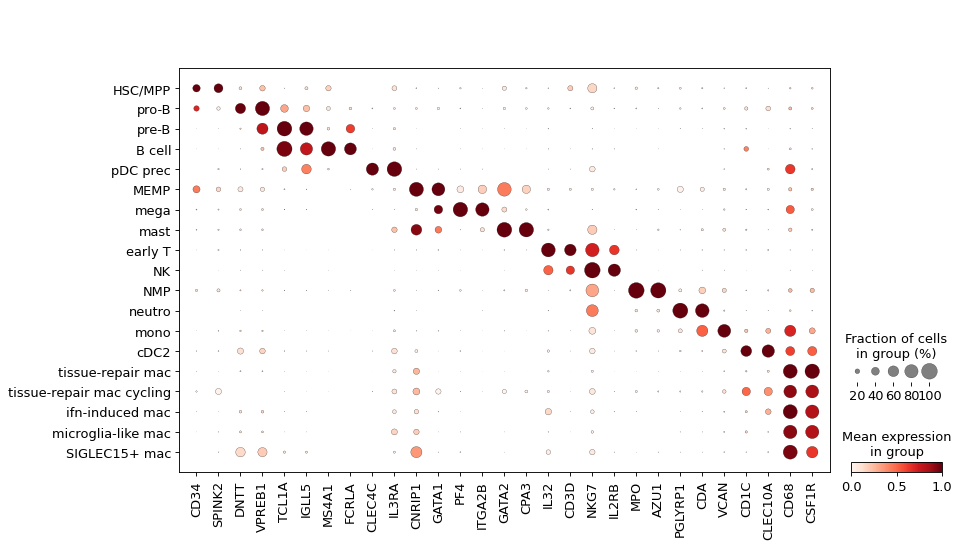

In [17]:
sc.pl.dotplot(adata, var_names = ['CD34', 'SPINK2', 
                                   'DNTT', 'VPREB1', 'TCL1A', 'IGLL5',
                                  'MS4A1', 'FCRLA',
                                  'CLEC4C', 'IL3RA', 'CNRIP1', 'GATA1', 'PF4', 'ITGA2B', 'GATA2', 'CPA3',
                                  'IL32', 'CD3D',  'NKG7', 'IL2RB',
                                  'MPO', 'AZU1', 'PGLYRP1', 'CDA', 'VCAN', 'CD1C', 'CLEC10A', 
                                        'CD68', 'CSF1R', 
                                  ], 
              groupby = 'clusters',use_raw = False, swap_axes = False, standard_scale = 'var', save = '_all_markers.pdf')

#### Immune cell type predictions

In [18]:
plotting_adata_obs = adata.obs
plotting_adata_obs.columns

Index(['batch', 'batch_collection', 'cryopreserved', 'individual', 'location',
       'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex',
       'stage', 'study', 'PCW', 'sample_source', 'doublet_score',
       'doublet_score_0.75', 'scrublet_score', 'scrublet_cluster_score',
       'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'leiden', 'enrichment',
       '5v1.1', 'TP', 'clusters', 'louvain', 'clusters_manual', 'S_score',
       'G2M_score', 'phase', 'liver_classifier', 'prob_B cell', 'prob_DC1',
       'prob_DC2', 'prob_Early lymphoid/T lymphocyte',
       'prob_Erythroblastic Island Macrophage', 'prob_HSC/MPP',
       'prob_ILC precursor', 'prob_Kupffer Cell', 'prob_MEMP',
       'prob_Mast cell', 'prob_Megakaryocyte', 'prob_Mono-Mac', 'prob_Mono-NK',
       'prob_Monocyte', 'prob_Monocyte-DC precursor', 'prob_NK',
       'prob_Neutrophil-myeloid progenitor',
       'prob_VCAM1+ Erythroblastic Island Macrophage', 'prob_pDC precursor',
       'prob_pre B cell', 'pr

In [19]:
# Rename probabilities to match my assigned cell_type 
plotting_adata_obs = plotting_adata_obs.rename(columns={'prob_B cell': 'prob_B cell', 
                'prob_Early lymphoid/T lymphocyte': 'prob_early-T', 'prob_HSC/MPP' : 'prob_HSC', 
                'prob_ILC precursor' : 'prob_ILC-prec', 
                'prob_MEMP' : 'prob_MEMP', 'prob_Mast cell' : 'prob_mast', 
                'prob_Megakaryocyte' : 'prob_mega', 'prob_NK' : 'prob_NK', 
            'prob_pDC precursor' : 'prob_pDC-prec', 'prob_pre B cell': 'prob_pre-B', 
                'prob_pre pro B cell ' : 'prob_pre-pro-B', 'prob_pro B cell' : 'prob_pro-B',
                                                       'prob_DC1': 'prob_cDC1', 
                 'prob_DC2' : 'prob_cDC2', 'prob_Kupffer Cell' : 'prob_Kupffer', 
                'prob_Mono-Mac' : 'prob_mono-mac', 
       'prob_Monocyte' : 'prob_mono', 'prob_Monocyte-DC precursor' : 'prob_mono-cDC-prec',
       'prob_Neutrophil-myeloid progenitor' : 'prob_NMP'})

In [20]:
# Create new anndata to exploit scanpy functions for plotting 
plotting_matrix = plotting_adata_obs[['prob_HSC',   
        'prob_pro-B', 'prob_pre-B', 'prob_B cell', 
           'prob_pDC-prec','prob_MEMP', 'prob_mega', 'prob_mast',
            'prob_early-T', 'prob_NK',
        'prob_NMP',  'prob_mono',
           'prob_cDC2', 
           'prob_mono-mac', 'prob_Kupffer'
        ]].values
plotting_matrix.shape

(19538, 15)

In [21]:
plotting_obs = adata.obs[['leiden', 'clusters']]
plotting_obs.shape

(19538, 2)

In [22]:
plotting_probs = ['prob_HSC',   
        'prob_pro-B', 'prob_pre-B', 'prob_B cell', 
           'prob_pDC-prec','prob_MEMP', 'prob_mega', 'prob_mast',
                                       'prob_early-T', 'prob_NK',
        'prob_NMP','prob_mono',
           'prob_cDC2',
           'prob_mono-mac', 'prob_Kupffer'
        ]

In [23]:
len(plotting_probs)

15

In [24]:
plotting_var_dict = {'probs' : plotting_probs, 'random_string' : [str(i) for i in range(15)]}
plotting_var = pd.DataFrame(plotting_var_dict)
plotting_var = plotting_var.set_index('probs')
plotting_var.head()
plotting_var.shape

(15, 1)

In [25]:
plotting_adata = anndata.AnnData(X = plotting_matrix, obs = plotting_obs, var = plotting_var)
plotting_adata

AnnData object with n_obs × n_vars = 19538 × 15
    obs: 'leiden', 'clusters'
    var: 'random_string'

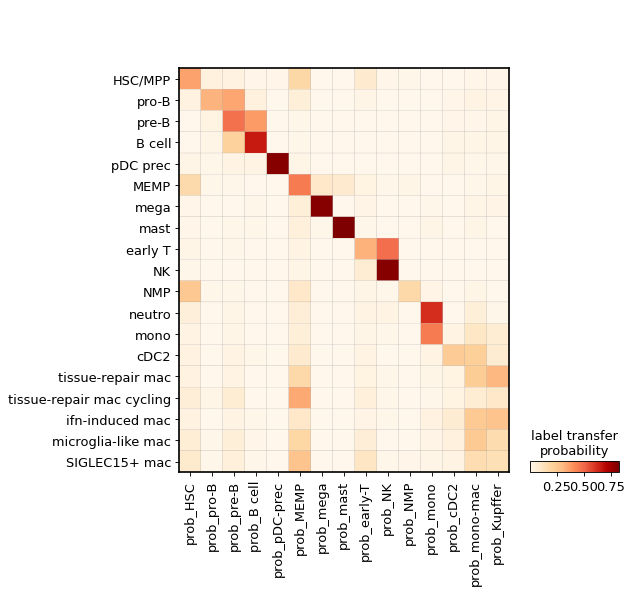

In [26]:
sc.pl.matrixplot(plotting_adata, var_names = plotting_probs, groupby = 'clusters', cmap = 'OrRd',
                  save = '_matrixplot.pdf', colorbar_title = "label transfer\nprobability",)

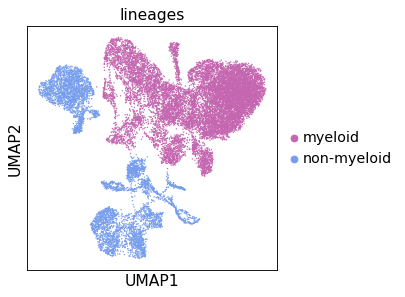

In [53]:
sc.pl.umap(adata, color = 'lineages', palette = gonads_colors)

#### Save

In [32]:
adata.write(path_to_gonads + 'immune_merged_lineages_annotated.h5ad')

#### TF-IDF markers

In [39]:
adata = sc.read(path_to_gonads + 'immune_merged_lineages_annotated.h5ad')

In [33]:
import anndata
adata = anndata.AnnData(X = adata.raw.X, var = adata.raw.var, obs = adata.obs)

In [34]:
%%R -i adata
adata

class: SingleCellExperiment 
dim: 28497 19538 
metadata(0):
assays(1): X
rownames(28497): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(194): gene_ids.0.0 feature_types.0.0 ...
  feature_types.52.1 n_cells.52.1
colnames(19538): FCA_GND8047884_CCCATACAGAGATGAG
  FCA_GND8047884_CTTAGGATCAGTGCAT ... HD_F_GON9883868_TTCCCAGGTATCACCA
  HD_F_GON9883868_TTCGGTCTCCAGAGGA
colData names(59): batch batch_collection ... main_lineages
  dpt_pseudotime
reducedDimNames(0):
altExpNames(0):


In [35]:
%%R -o mrks

library(SoupX)
counts <- assay(adata, "X")
colnames(counts) <- colnames(adata)
rownames(counts) <- rownames(adata)
mrks = quickMarkers(counts, colData(adata)$clusters, N = 100) # where clusters is the cell type assignment and 20 means I want the top 20 genes per cluster that pass the hypergeometric test

In [36]:
mrks

,gene,cluster,geneFrequency,geneFrequencyOutsideCluster,geneFrequencySecondBest,geneFrequencyGlobal,secondBestClusterName,tfidf,idf,qval
1,SMIM24,HSC/MPP,0.756646,0.038007,0.649635,0.055993,MEMP,2.181048,2.882521,0.000000e+00
2,SPINK2,HSC/MPP,0.470348,0.011497,0.178832,0.022981,MEMP,1.774666,3.773094,3.237162e-260
3,PRSS57,HSC/MPP,0.638037,0.053546,0.952555,0.068175,MEMP,1.713563,2.685680,2.067750e-243
4,TTN,HSC/MPP,0.472393,0.017901,0.170616,0.029276,mast,1.668008,3.530978,1.096462e-230
5,JCHAIN,HSC/MPP,0.584867,0.045987,0.958333,0.059474,pDC prec,1.650623,2.822219,1.106046e-224
...,...,...,...,...,...,...,...,...,...,...
1896,ADK,SIGLEC15+ mac,0.644377,0.133115,0.496350,0.141724,MEMP,1.259032,1.953875,7.122250e-97
1897,RAI14,SIGLEC15+ mac,0.267477,0.004998,0.023697,0.009418,mast,1.247830,4.665181,2.947322e-106
1898,IGSF21,SIGLEC15+ mac,0.392097,0.035556,0.098592,0.041560,ifn-induced mac,1.247111,3.180616,7.555585e-90
1899,MAGEF1,SIGLEC15+ mac,0.626140,0.128846,0.345962,0.137220,cDC2,1.243621,1.986171,2.601494e-93


In [37]:
mrks.to_csv("/home/jovyan/Immune_markersTFIDF.csv")

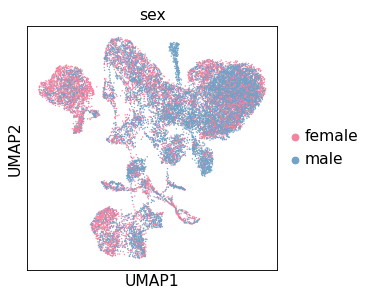

In [40]:
sex_colors = ['#f5829f', '#71a2c7']
sc.pl.umap(adata, color='sex',legend_fontsize = 'medium', legend_fontweight = 'medium',
           save='_immune_sex.pdf', palette = sex_colors)

In [11]:
np.unique(adata.obs.stage)

array(['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '21.0', '6.0', '7.0', '7.5', '8.4', '8.6', '8.8',
       '9.0'], dtype=object)

In [15]:
adata.obs.stage = adata.obs.stage.astype(float)

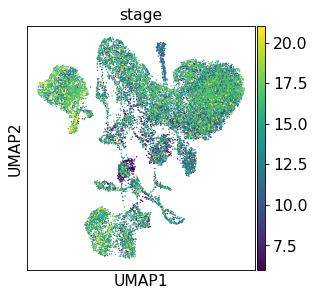

In [16]:
sc.pl.umap(adata, color='stage',legend_fontsize = 'medium', 
           legend_fontweight = 'medium', color_map = 'viridis',
           save='_immune_stage.pdf')

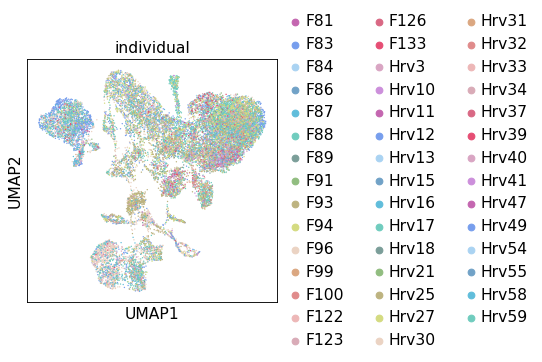

In [18]:
sc.pl.umap(adata, color='individual',legend_fontsize = 'medium', legend_fontweight = 'medium',
           save='_supporting_individual.pdf', palette = gonads_colors)

In [11]:
scmap = pd.read_csv(path_to_gonads + 'scmap_from_Bian.csv', index_col = 0)
scmap.shape

(7581, 2)

In [12]:
scmap = scmap.rename({'scmap_labels' : 'projection by scmap'}, axis = 1)

In [13]:
for col in scmap: 
    mapping = scmap[col].to_dict()
    adata.obs[col] = adata.obs_names.map(mapping)

In [23]:
cols = ['firebrick']

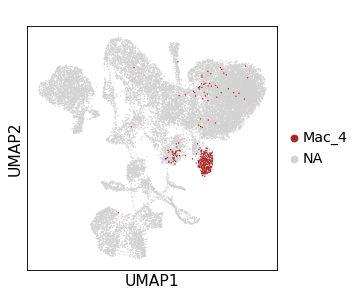

In [24]:
sc.pl.umap(adata, color = 'projection by scmap', groups = 'Mac_4', 
           title = " ", palette = cols, frameon = True, save = '_scmap_immune.pdf')

In [3]:
svm = pd.read_csv(path_to_gonads + '_SVM_predictions_Bian.csv', index_col = 0)
svm.shape

(19538, 13)

In [5]:
svm.to_csv('/home/jovyan/Microglia_Bian2020_predictions_immune.csv')

In [17]:
for col in svm: 
    mapping = svm[col].to_dict()
    adata.obs[col] = adata.obs_names.map(mapping)

In [63]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridisBig = cm.get_cmap('OrRd', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.14, 1, 256)))

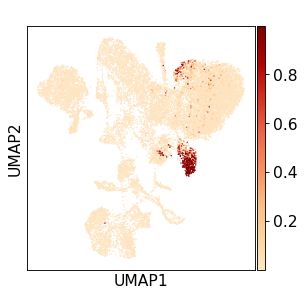

In [64]:
sc.pl.umap(adata, color = 'prob_Mac_4', color_map = newcmp,
           title = " ",  frameon = True, save = '_svm_immune.pdf')

In [41]:
macros = adata[[i in ['tissue-repair mac', 'ifn-induced mac', 'microglia-like mac', 'SIGLEC15+ mac'] for i in adata.obs['clusters']]]
macros.shape

(8875, 20675)

In [42]:
macros.write(path_to_gonads + 'macrophages.h5ad')

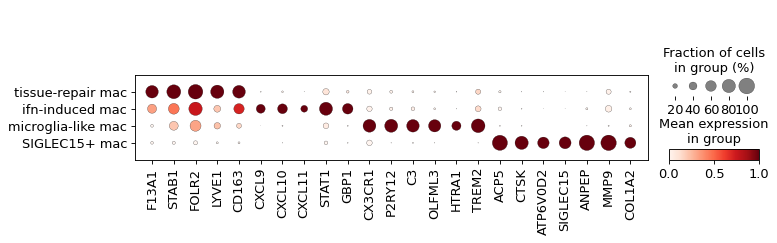

In [44]:
sc.pl.dotplot(adata[[i in ['tissue-repair mac', 'ifn-induced mac', 'microglia-like mac', 'SIGLEC15+ mac'] for i in adata.obs['clusters']]],
              var_names = [ 'F13A1', 'STAB1', 'FOLR2', 'LYVE1', 'CD163', 
          'CXCL9', 'CXCL10', 'CXCL11', 'STAT1', 'GBP1',
          'CX3CR1', 'P2RY12', 'C3', 'OLFML3', 'HTRA1', 'TREM2', 
          'ACP5', 'CTSK', 'ATP6V0D2', 'SIGLEC15', 'ANPEP', 'MMP9', 'COL1A2'], 
              groupby = 'clusters',  use_raw = False, standard_scale = 'var', save = '_markers.pdf',
             swap_axes= False)

In [46]:
macros_metadata = macros.obs[['sex', 'clusters']]

In [47]:
%%R 

library(ggplot2)

In [48]:
%%R -i macros_metadata

sex_colors = c('lightcoral', 'lightskyblue')
ggplot(macros_metadata, aes(x=macros_metadata$clusters, fill = macros_metadata$sex) ) + 
  scale_fill_manual(values = sex_colors) +
  #facet_wrap(~sex)+
  geom_bar(position = "fill")+
  theme_minimal(15) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
ggsave(filename = paste0('/home/jovyan/Gonads/Males_and_Females/final-figures/merged/labels_apr2021/macrophages_sex.pdf'), dpi = 300, 
       width = 4.5, height = 6.5)

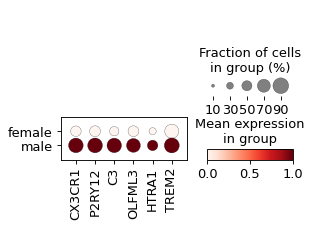

In [49]:
sc.pl.dotplot(adata[[i in ['microglia-like mac'] for i in adata.obs['clusters']]],
              var_names = [ 
          'CX3CR1', 'P2RY12', 'C3', 'OLFML3', 'HTRA1',  'TREM2'], 
              groupby = 'sex',  use_raw = True, standard_scale = 'var', save = '_microglia_sex.pdf',
             swap_axes= False)

### Quantification of cells belonging to each lineage 

In [18]:
adata.obs['main_lineages'].value_counts()

myeloid      13499
T/NK          2271
B             2081
mega/mast      711
HSC/MPP        489
NMP            343
pDC prec       144
Name: main_lineages, dtype: int64

In [19]:
# Remove progenitor states 
main_lineages_2 = {'HSC/MPP' : 'HSC/MPP', 'B' : 'B lymphoid', 'pDC prec' : 'pDC prec', 
                   'T/NK' : 'T/NK', 
                  'NMP' : 'myeloid', 'myeloid' : 'myeloid', 
                  'mega/mast' : 'mega/mast'}
adata.obs['main_lineages_2'] = adata.obs['main_lineages'].map(main_lineages_2)
adata.obs['main_lineages_2'].value_counts(dropna = False)

myeloid       13842
T/NK           2271
B lymphoid     2081
mega/mast       711
HSC/MPP         489
pDC prec        144
Name: main_lineages_2, dtype: int64

... storing 'main_lineages_2' as categorical


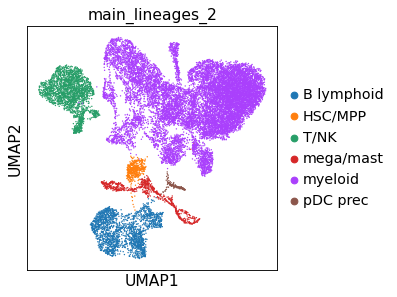

In [20]:
sc.pl.umap(adata, color = 'main_lineages_2')

In [21]:
adata.obs['stage'].value_counts()

11.0    4997
17.0    4050
14.0    3317
6.0     2259
12.0    1852
21.0     465
7.5      450
9.0      408
8.6      408
15.0     372
19.0     212
16.0     206
7.0      186
10.0     162
13.0     102
8.4       50
18.0      37
8.8        5
Name: stage, dtype: int64

In [22]:
# Add trimester information
trimester = {'11.0' : 'first', '17.0' : 'second', '14.0' : 'second', '6.0' : 'first', '12.0' : 'first', '7.5' : 'first', 
            '9.0' : 'first', '8.6' : 'first', '15.0' : 'second', '19.0' : 'second', '16.0' : 'second',
            '7.0' : 'first', '10.0' : 'first', '13.0' : 'second', '8.4' : 'first', '8.8' : 'first',
            '21.0' : 'second', '18.0' : 'second', '17.0' : 'second', '19.0' : 'first'}
adata.obs['trimester'] = adata.obs['stage'].map(trimester)
adata.obs['trimester'].value_counts(dropna = False)

first     10989
second     8549
Name: trimester, dtype: int64

... storing 'trimester' as categorical


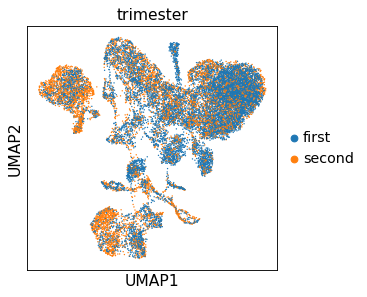

In [23]:
sc.pl.umap(adata, color = 'trimester')

In [24]:
adata_metadata = adata.obs[['trimester', 'main_lineages_2', 'sex']]

In [32]:
%%R -i adata_metadata

library(tidyverse)
adata_metadata = adata_metadata %>%
  mutate(main_lineages_2 = fct_relevel(main_lineages_2, 
            "HSC/MPP", 'B lymphoid',  'pDC prec', 'mega/mast', 'T/NK','myeloid'))
lineages_colors = c('#c466b0', '#aad3f2', '#70ccbe', '#91bd80',  '#dba781', 
                   '#d96884')

ggplot(adata_metadata, aes(x=adata_metadata$trimester, fill = adata_metadata$main_lineages_2) ) + 
  scale_fill_manual(values = lineages_colors) +
  #facet_wrap(~adata_metadata$sex)+
  geom_bar(position = "fill")+
  theme_minimal(15) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
ggsave(filename = paste0('/home/jovyan/Gonads/Males_and_Females/final-figures/merged/labels_apr2021/immune_lineages.pdf'), dpi = 300, 
       width = 6.5, height = 6.5)

### Mouse macrophages comparison

In [50]:
males = adata[[i in ['male'] for i in adata.obs['sex']]]

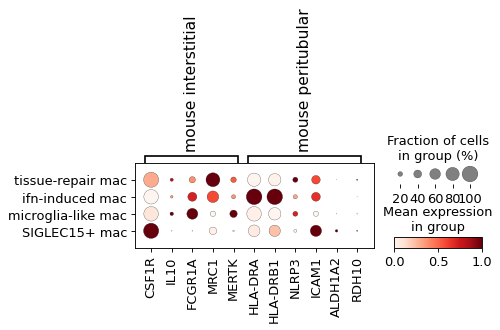

In [51]:
sc.pl.dotplot(males[[i in ['tissue-repair mac', 'ifn-induced mac', 'microglia-like mac', 'SIGLEC15+ mac'] for i in males.obs['clusters']]],
              var_names = ['CSF1R', 'IL10', 'FCGR1A', 'MRC1', 'MERTK', 'HLA-DRA', 'HLA-DRB1', 'NLRP3', 'ICAM1', 
                           'ALDH1A2', 'RDH10'], 
              groupby = 'clusters',  use_raw = True, standard_scale = 'var', save = '_mouse_markers.pdf',
             swap_axes= False, var_group_positions = [(0,4), (5,10)], var_group_labels = ['mouse interstitial', 
                                                            'mouse peritubular', 'new from Roser'])

In [68]:
cytokines = ['GDNF', 'EGF', 'TGFB1', 'TGFB2','TGFB3','FGF2']

### CellphoneDB plots

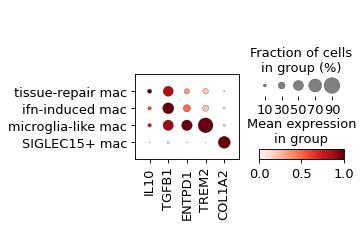

In [52]:
sc.pl.dotplot(adata[[i in ['tissue-repair mac', 'ifn-induced mac','microglia-like mac', 'SIGLEC15+ mac'] for i in adata.obs['clusters']]],
              var_names = ['IL10', 'TGFB1', 'ENTPD1', 'TREM2', 'COL1A2',], 
              groupby = 'clusters',  use_raw = False,  save = '_markers_interactions.pdf',
    standard_scale = 'var') # ,

### Create cellxgene object

 * cellxgene works faster when the expression matrix is stored in CSC (compressed sparse column) format instead of CSR (compressed sparse row) format or dense Numpy array (which sometimes can create a smaller h5ad file depending on the sparsity of your data).

In [57]:
import scipy
adata.X = scipy.sparse.csc_matrix(adata.X)

In [59]:
del adata.obsm['X_diffmap']

In [61]:
del adata.obsm['X_draw_graph_fa']

In [64]:
adata.obs.columns

Index(['batch', 'batch_collection', 'cryopreserved', 'individual', 'location',
       'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex',
       'stage', 'study', 'PCW', 'sample_source', 'doublet_score',
       'doublet_score_0.75', 'scrublet_score', 'scrublet_cluster_score',
       'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'leiden', 'enrichment',
       '5v1.1', 'TP', 'clusters', 'louvain', 'clusters_manual', 'S_score',
       'G2M_score', 'phase', 'liver_classifier', 'prob_B cell', 'prob_DC1',
       'prob_DC2', 'prob_Early lymphoid/T lymphocyte',
       'prob_Erythroblastic Island Macrophage', 'prob_HSC/MPP',
       'prob_ILC precursor', 'prob_Kupffer Cell', 'prob_MEMP',
       'prob_Mast cell', 'prob_Megakaryocyte', 'prob_Mono-Mac', 'prob_Mono-NK',
       'prob_Monocyte', 'prob_Monocyte-DC precursor', 'prob_NK',
       'prob_Neutrophil-myeloid progenitor',
       'prob_VCAM1+ Erythroblastic Island Macrophage', 'prob_pDC precursor',
       'prob_pre B cell', 'pr

In [67]:
metadata = ['individual', 'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex',
        'PCW', 'scrublet_score', 'scrublet_cluster_score',
       'is_doublet', 'leiden', 'clusters']
adata.obs = adata.obs[metadata]

In [68]:
adata.obs

,individual,n_counts,n_genes,percent_mito,process,sample,sex,PCW,scrublet_score,scrublet_cluster_score,is_doublet,leiden,clusters
FCA_GND8047884_CCCATACAGAGATGAG,F81,2339.0,1017,0.034630,CD45+,FCA_GND8047884,female,8.8,0.280000,0.113043,False,25,mega
FCA_GND8047884_CTTAGGATCAGTGCAT,F81,1895.0,765,0.030079,CD45+,FCA_GND8047884,female,8.8,0.280000,0.224880,False,2,tissue-repair mac
FCA_GND8047884_TGGCCAGCAGAAGCAC,F81,33040.0,5200,0.036017,CD45+,FCA_GND8047884,female,8.8,0.224880,0.224880,False,9,tissue-repair mac cycling
FCA_GND8047884_TTCGAAGCATGTCTCC,F81,19415.0,3601,0.035179,CD45+,FCA_GND8047884,female,8.8,0.224880,0.224880,False,6,cDC2
FCA_GND8125922_AAACCTGAGTGGGCTA,F86,8367.0,2562,0.037050,CD45+,FCA_GND8125922,female,7.5,0.044831,0.016656,False,2,tissue-repair mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD_F_GON9883868_TGGACGCAGAAGGCCT,Hrv54,3357.0,1631,0.035746,total,HD_F_GON9883868,male,21.0,0.064639,0.098546,False,2,tissue-repair mac
HD_F_GON9883868_TGTATTCAGAAACGCC,Hrv54,1443.0,819,0.161469,total,HD_F_GON9883868,male,21.0,0.150215,0.107692,False,13,microglia-like mac
HD_F_GON9883868_TTATGCTGTCAGAGGT,Hrv54,2435.0,1305,0.039819,total,HD_F_GON9883868,male,21.0,0.098546,0.098546,False,1,tissue-repair mac
HD_F_GON9883868_TTCCCAGGTATCACCA,Hrv54,5196.0,2297,0.081586,total,HD_F_GON9883868,male,21.0,0.107692,0.098546,False,0,tissue-repair mac


In [70]:
adata.obs['PCW'] = np.float32(adata.obs['PCW'])
adata.obs['scrublet_score'] = np.float32(adata.obs['scrublet_score'])
adata.obs['scrublet_cluster_score'] = np.float32(adata.obs['scrublet_cluster_score'])
adata.obs['n_counts'] = np.float32(adata.obs['n_counts'])
adata.obs['n_genes'] = np.float32(adata.obs['n_genes'])
adata.obs['percent_mito'] = np.float32(adata.obs['percent_mito'])

In [71]:
adata.obs['individual'] = pd.Categorical(adata.obs['individual'])
adata.obs['process'] = pd.Categorical(adata.obs['process'])
adata.obs['sample'] = pd.Categorical(adata.obs['sample'])
adata.obs['sex'] = pd.Categorical(adata.obs['sex'])
adata.obs['leiden'] = pd.Categorical(adata.obs['leiden'])
adata.obs['clusters'] = pd.Categorical(adata.obs['clusters'])

In [72]:
adata

AnnData object with n_obs × n_vars = 19538 × 20675
    obs: 'individual', 'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex', 'PCW', 'scrublet_score', 'scrublet_cluster_score', 'is_doublet', 'leiden', 'clusters'
    var: 'gene_ids-0-0', 'feature_types-0-0', 'n_cells-0-0', 'gene_ids-1-0', 'feature_types-1-0', 'n_cells-1-0', 'gene_ids-2-0', 'feature_types-2-0', 'n_cells-2-0', 'gene_ids-3-0', 'feature_types-3-0', 'n_cells-3-0', 'gene_ids-4-0', 'feature_types-4-0', 'n_cells-4-0', 'gene_ids-5-0', 'feature_types-5-0', 'n_cells-5-0', 'gene_ids-6-0', 'feature_types-6-0', 'n_cells-6-0', 'gene_ids-7-0', 'feature_types-7-0', 'n_cells-7-0', 'gene_ids-8-0', 'feature_types-8-0', 'n_cells-8-0', 'gene_ids-9-0', 'feature_types-9-0', 'n_cells-9-0', 'gene_ids-10-0', 'feature_types-10-0', 'n_cells-10-0', 'n_cells-0', 'gene_ids-0-1', 'feature_types-0-1', 'n_cells-0-1', 'gene_ids-1-1', 'feature_types-1-1', 'n_cells-1-1', 'gene_ids-2-1', 'feature_types-2-1', 'n_cells-2-1', 'gene_ids-3-1', 'fea

In [78]:
del adata.obsp
del adata.varm
del adata.uns

In [80]:
del adata.var

In [91]:
adata.obs.columns = ['individual', 'n_counts', 'n_genes', 'percent_mito', 'process',
       'sample', 'sex', 'PCW', 'scrublet_score', 'scrublet_cluster_score',
       'is_doublet', 'leiden', 'cell_type']

In [92]:
adata.write(path_to_gonads + 'immune_cellxgene.h5ad')

In [93]:
path_to_gonads

'/nfs/team292/vl6/immune_fetal_gonads/'

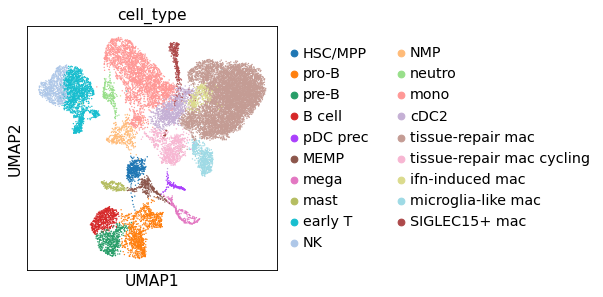

In [95]:
sc.pl.umap(adata, color = 'cell_type')